<a href="https://colab.research.google.com/github/Feekah/A-Simple-Calculator-with-python/blob/main/Roy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **An Investigative Traverse on 1994 Adult Income Statistics using Machine Learning Methods.**

In [48]:
#Libraries Importation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler



In [2]:
#Reading in the data
incom = pd.read_csv('AdultIncome.csv')

# **Exploratory Data Analysis**

In [3]:
#Let's check the first 5 rows of the data as well as the last 5 rows of the data
incom.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#let's check the data types of the columns
incom.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

In [5]:
#Get the number of rows and columns
num_rows = incom.shape[0]
num_columns = incom.shape[1]

print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

Number of rows: 32561
Number of columns: 15


In [6]:
#Check the shape of the dataset
incom.shape

(32561, 15)

In [7]:
#Let's have a count of the categorical variables and the numerical variables

#Get a count of the categorical variables
cat_vars = incom.select_dtypes(include=['object']).columns
cat_var_count = len(cat_vars)
print(f'Number of categorical variables: {cat_var_count}')

# Get a count of the numerical variables
num_vars = incom.select_dtypes(include=['int64', 'float64']).columns
num_var_count = len(num_vars)
print(f'Number of numerical variables: {num_var_count}')

Number of categorical variables: 9
Number of numerical variables: 6


In [8]:
#Let's check the statistical summary of the numerical variables
incom.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
#Let's print out the minimum and maximum values of the numerical variables


#let's put them side by side in a tabular format and rename the columns as minimum values and maximum values
pd.concat([incom[num_vars].min(), incom[num_vars].max()], axis=1).rename(columns={0:'Minimum Values', 1:'Maximum Values'})

,Minimum Values,Maximum Values
age,17,90
fnlwgt,12285,1484705
education-num,1,16
capital-gain,0,99999
capital-loss,0,4356
hours-per-week,1,99


In [10]:
#Now let's check the number of missing values in each column
incom.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

# **Data Wrangling**

In [11]:
#If we observe the previous result clearly, there's a space in front of the column names, except age. 
#All spaces need to be taken out

incom.columns = incom.columns.str.strip()
incom.columns

#There is still space in the values. Let's remove all the spaces in the entire dataframe
incom = incom.apply(lambda x: x.str.strip() if x.dtype == "object" else x)                                #apply the lambda function to the entire dataframe

incom['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [12]:
#The null columns have "?" instead of NaN
#Let's replace the "?" with NaN
incom = incom.replace('?', np.nan)

#Let's check the number of missing values in each column
incom.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [13]:
#We can now see the number of null values we have

#let's check how many rows have missing values
incom[incom.isnull().any(axis=1)].shape[0]

#And get the percentage of missing values in each column
incom.isnull().sum()/incom.shape[0]*100

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.790486
income            0.000000
dtype: float64

## **Visualization**

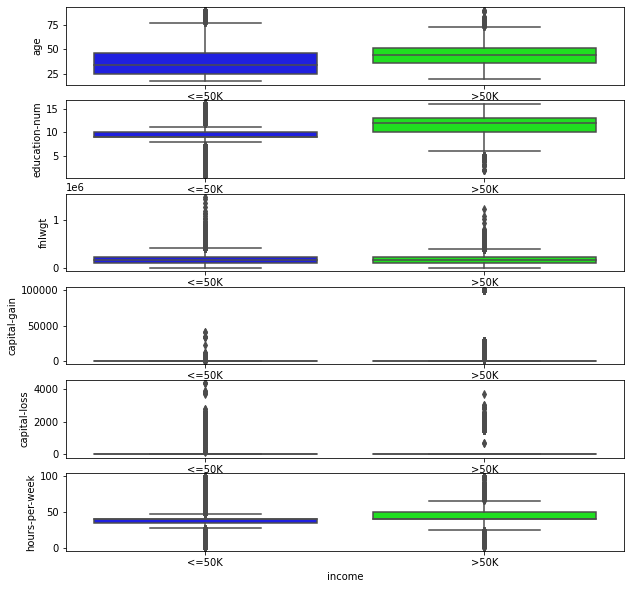

In [14]:
#This code creates a boxplot for each continuous variable with respect to the target variable
# Select the continuous variables
cont_vars = ["age", "education-num", "fnlwgt", "capital-gain", "capital-loss", "hours-per-week"]

# Create a figure with subplots
fig, ax = plt.subplots(nrows=len(cont_vars), ncols=1, figsize=(10, 10))

# Set the color palette
sns.set_palette(["#0000FF", "#00FF00"])

# Iterate through the continuous variables
for i, var in enumerate(cont_vars):
    # Create a boxplot of the variable
    sns.boxplot(x="income", y=var, data=incom, ax=ax[i])

# Show the plot
plt.show()

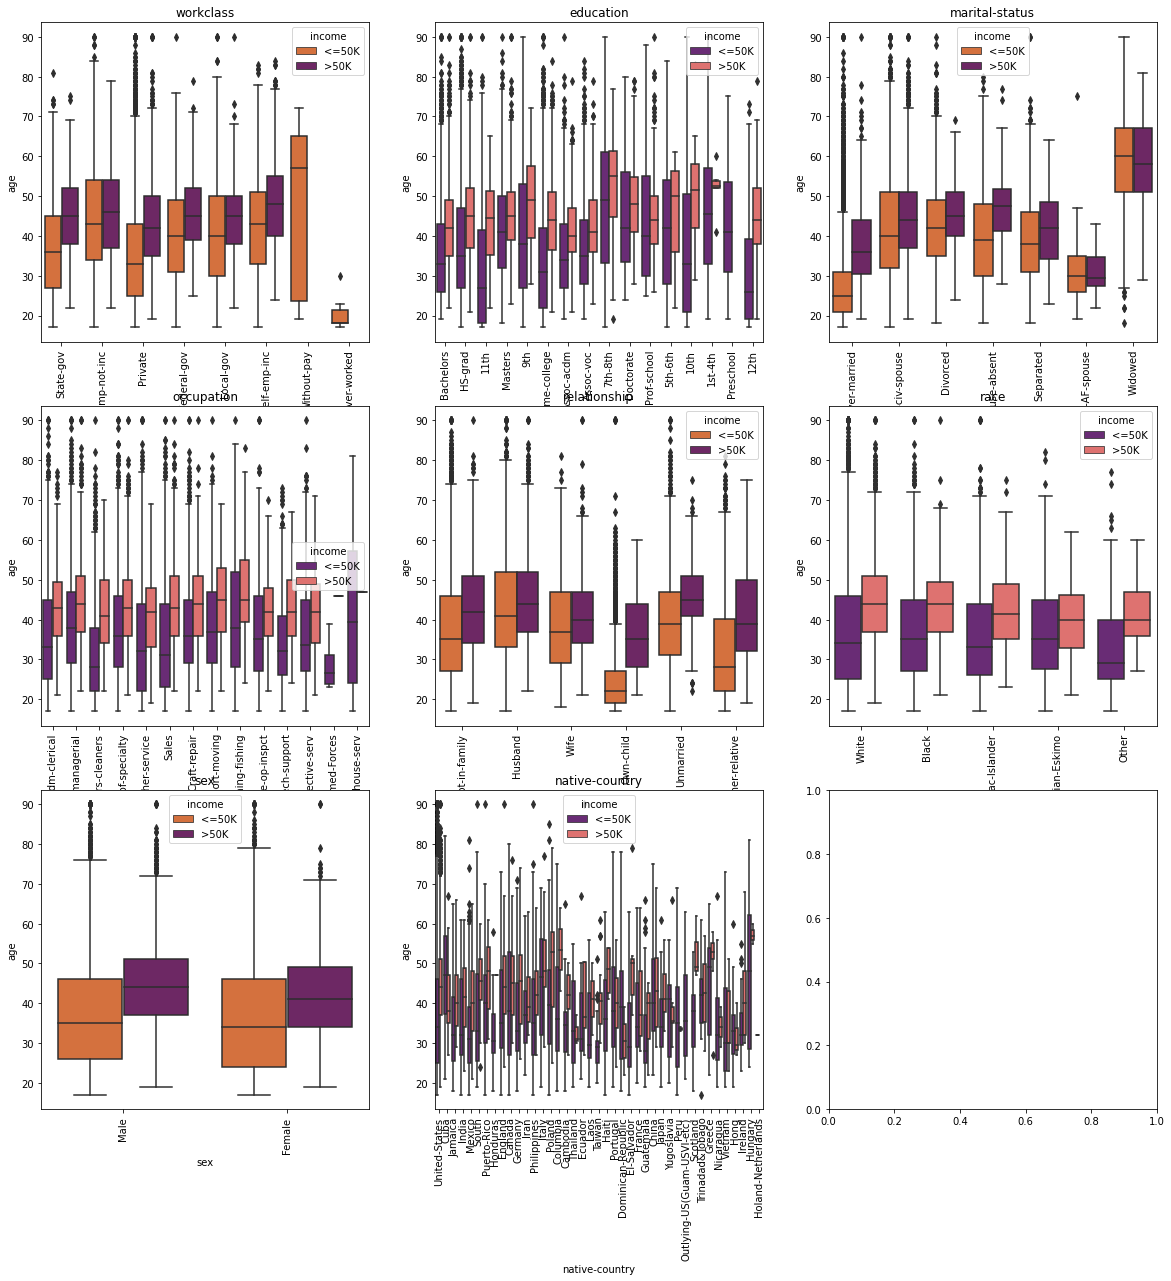

In [15]:
#Plotting the categorical variables with respect to age and the target variable

palette_options = ["inferno_r", "magma", "inferno_r", "magma", "inferno_r", "magma", "inferno_r", "magma"]
cat_vars = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
ax = ax.flatten()


for i, var in enumerate(cat_vars):
# Create a boxplot of the variable
    sns.boxplot(x=var, y="age", hue="income", data=incom, palette=palette_options[i],  ax=ax[i])
    plt.setp(ax[i].get_xticklabels(), rotation=90)
    ax[i].set_title(var)

plt.show()

#let's title each subplot using the cat_vars list
palette_options = ["inferno_r", "magma", "inferno_r", "magma", "inferno_r", "magma", "inferno_r", "magma"]


# **Correlation**
We need to check how the features correlate with the target variable

In [16]:
#Checking for correlation of the categorical variables with the target variable: income
#Using the chi-squared method

# Convert the data to categorical data type
incom[cat_vars] = incom[cat_vars].astype("category")

# Loop through the categorical columns
for col in cat_vars:
    # Create a contingency table
    contingency_table = pd.crosstab(incom[col], incom["income"])

    # Get the p-value of the chi-squared test
    _, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"p-value for {col}: {p_value}")



p-value for workclass: 1.9338476684848218e-174
p-value for education: 0.0
p-value for marital-status: 0.0
p-value for occupation: 0.0
p-value for relationship: 0.0
p-value for race: 2.305960610160958e-70
p-value for sex: 0.0
p-value for native-country: 8.280446050912632e-45


                     age  education-num    fnlwgt  capital-gain  capital-loss  \
age             1.000000       0.036527 -0.076646      0.077674      0.057775   
education-num   0.036527       1.000000 -0.043195      0.122630      0.079923   
fnlwgt         -0.076646      -0.043195  1.000000      0.000432     -0.010252   
capital-gain    0.077674       0.122630  0.000432      1.000000     -0.031615   
capital-loss    0.057775       0.079923 -0.010252     -0.031615      1.000000   
hours-per-week  0.068756       0.148123 -0.018768      0.078409      0.054256   
income          0.234037       0.335154 -0.009463      0.223329      0.150526   

                hours-per-week    income  
age                   0.068756  0.234037  
education-num         0.148123  0.335154  
fnlwgt               -0.018768 -0.009463  
capital-gain          0.078409  0.223329  
capital-loss          0.054256  0.150526  
hours-per-week        1.000000  0.229689  
income                0.229689  1.000000  


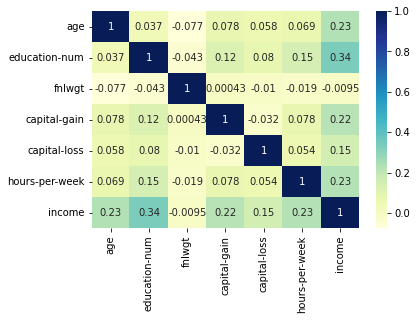

In [17]:
#Checking for correlation of the continuous variables with the target variable: income
#Using the correlation matrix method

#We need to encode the income column to binary values for it to be included in the correlation matrix:
incom['income'] = incom['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Calculate the correlation matrix
corr_matrix = incom[cont_vars + ["income"]].corr()

# Print the correlation matrix
print(corr_matrix)

sns.heatmap(corr_matrix, 
            cmap="YlGnBu", 
            annot=True)

# Show the plot
plt.show()


# **Feature Selection**
Based on the correlation results above, all categorical values have a p-values of <=0.05, which indicated a moderate to high correlation with the income variable

For the continuous variables, the lowest correlation coefficients are fnlwgt, capital loss, and capital gain features.

The fnlwgt column would be dropped as it has the lowest correlation coefficient.

In [18]:
#Dropping the fnlwgt column
AdultIncom = incom.drop('fnlwgt', axis=1)
AdultIncom.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

# **Filling Missing values**

In [19]:
#Let's check the columns with null values and the percentage of missing values

for col in AdultIncom.columns:
    missing_values = AdultIncom[col].isnull().sum()
    if missing_values > 0:
        percentage_missing = 100 * missing_values / AdultIncom.shape[0]
        print(f'Column {col} has {missing_values} missing values ({percentage_missing:.2f}% of the total)')

Column workclass has 1836 missing values (5.64% of the total)
Column occupation has 1843 missing values (5.66% of the total)
Column native-country has 583 missing values (1.79% of the total)


In [20]:
#Observed that the columns with missing values are categorical. 
#We proceed to replace the missing values with the mode of each column with missing values

incomNonull = AdultIncom
null_categorical_columns = ["workclass", "occupation", "native-country"]

for col in null_categorical_columns:
    mode_value = incomNonull[col].mode()[0]  # Get the mode value
    incomNonull[col] = incomNonull[col].fillna(mode_value)  # Fill null values with the mode value

In [21]:
#Let's check for null values now
incomNonull.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [22]:
#let's change the income column name to "EarnsOver50K"

incomNonull = incomNonull.rename(columns={'income': 'EarnsOver50K'})

# Encoding Categorical Variables
We would be using One-hot encoding, as it is suitable for large datasets such as the one we have.

In [23]:
# Apply one-hot encoding to the categorical columns
incData = pd.get_dummies(incomNonull, columns=cat_vars)

# Print the resulting dataframe
print(incData)

       age  education-num  capital-gain  capital-loss  hours-per-week  \
0       39             13          2174             0              40   
1       50             13             0             0              13   
2       38              9             0             0              40   
3       53              7             0             0              40   
4       28             13             0             0              40   
...    ...            ...           ...           ...             ...   
32556   27             12             0             0              38   
32557   40              9             0             0              40   
32558   58              9             0             0              40   
32559   22              9             0             0              20   
32560   52              9         15024             0              40   

       EarnsOver50K  workclass_Federal-gov  workclass_Local-gov  \
0                 0                      0              

# **Splitting the data into test and train sets**
Test size is 0.2, random_state is 42

In [24]:
# Split the data into features and target
X = incData.drop(columns=['EarnsOver50K'])
y = incData['EarnsOver50K']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Problem Solving**

We will be solving three different problems.
Each problem will be solved with at least two methods.
The methods will be compared and evaluated for best performance

**1. Predicting whether a census particpant earns over 50k or less**

### Model 1: Decision Tree Classifier

In [25]:
#Decision Tree Classifier

DTmodel = DecisionTreeClassifier()
DTmodel.fit(X_train, y_train)
y_pred = DTmodel.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print(f'Accuracy: {accuracy_percentage:.2f}%')

Accuracy: 82.25%


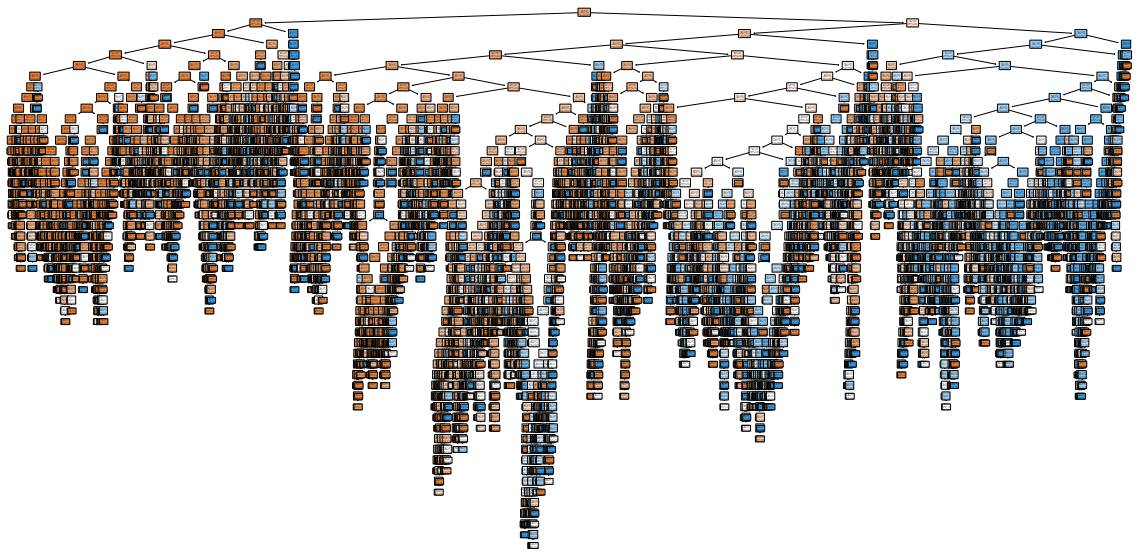

In [26]:
#Plotting the decision tree

plt.figure(figsize=(20,10))
plot_tree(DTmodel, filled=True, rounded=True, class_names=['<=50K', '>50K'])
plt.show()


In [27]:
#Let's get the depth of the tree
depth = DTmodel.tree_.max_depth
print(depth)

50


# **Model Optimization for Decision Tree**

In [28]:
#Using cross-validation to optimize the decision tree

# create a new decision tree classifier
DTmodel2 = DecisionTreeClassifier()

# use cross_val_score to evaluate the decision tree using 10-fold cross-validation
scores = cross_val_score(DTmodel2, X, y, cv=10)

# print the mean accuracy and the standard deviation of the accuracy scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.82 (+/- 0.01)


Depth: 5, Accuracy: 0.85 (+/- 0.01)
Depth: 6, Accuracy: 0.85 (+/- 0.01)
Depth: 7, Accuracy: 0.86 (+/- 0.01)
Depth: 8, Accuracy: 0.86 (+/- 0.00)
Depth: 9, Accuracy: 0.86 (+/- 0.01)
Depth: 10, Accuracy: 0.86 (+/- 0.01)
Depth: 11, Accuracy: 0.86 (+/- 0.01)
Depth: 12, Accuracy: 0.86 (+/- 0.01)
Depth: 13, Accuracy: 0.86 (+/- 0.01)
Depth: 14, Accuracy: 0.85 (+/- 0.01)
Depth: 15, Accuracy: 0.85 (+/- 0.01)
Depth: 16, Accuracy: 0.85 (+/- 0.01)
Depth: 17, Accuracy: 0.85 (+/- 0.01)
Depth: 18, Accuracy: 0.84 (+/- 0.01)
Depth: 19, Accuracy: 0.84 (+/- 0.00)
Depth: 20, Accuracy: 0.84 (+/- 0.01)


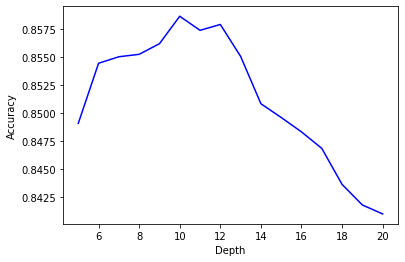

In [29]:
#Testing different tree depths to gt the depth that maximises accuracy.

depths = range(5, 21)
scores = []
for depth in depths:
    DTmodel2 = DecisionTreeClassifier(max_depth=depth)
    score = cross_val_score(DTmodel2, X, y, cv=10)
    scores.append(np.mean(score))
    print("Depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (depth, score.mean(), score.std()))

# Create a dataframe with the results
results = pd.DataFrame({'Depth': depths, 'Accuracy': scores})

# Use seaborn to plot the results
sns.lineplot(x='Depth', y='Accuracy', data=results)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()


In [31]:
#Using the optimal depth of 10
DTmodel2 = DecisionTreeClassifier(max_depth=9)
DTmodel2.fit(X_train, y_train)
y_pred = DTmodel2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print(f'Accuracy: {accuracy_percentage:.2f}%')

Accuracy: 85.91%


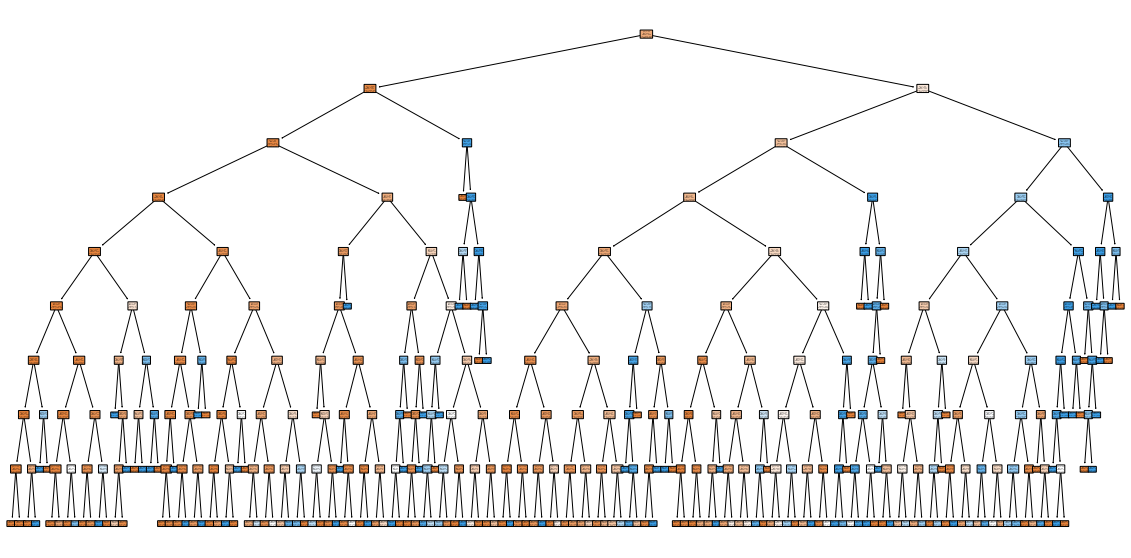

In [32]:
#Plotting the optimal decision Tree
plt.figure(figsize=(20,10))
plot_tree(DTmodel2, filled=True, rounded=True, class_names=['<=50K', '>50K'])
plt.show()

[[4670  272]
 [ 646  925]]


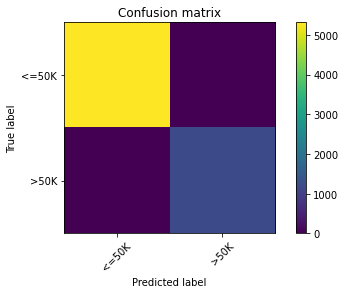

In [33]:
#Plotting the confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap='viridis')
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ["<=50K", ">50K"], rotation=45)
    plt.yticks(tick_marks, ["<=50K", ">50K"])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

plot_confusion_matrix(y_pred, y_pred)


# Model 2: Random Forest Classifier

In [34]:
RFmodel = RandomForestClassifier()

# Fit the classifier to the training data
RFmodel.fit(X_train, y_train)

# Make predictions on the test data
y_pred = RFmodel.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8507600184246891


# **Model Optimization for Decision Tree**

In [35]:
# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20]
}

# Initialize the random forest classifier
rf = RandomForestClassifier()

# Set up the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print(grid_search.best_params_)

# Use the best hyperparameters to make predictions on the test set
y_pred = grid_search.predict(X_test)

# Evaluate the model performance on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {accuracy:.2f}')

{'max_depth': 30, 'min_samples_split': 20, 'n_estimators': 50}
Test set accuracy: 0.87


In [37]:
# Create the optimal random forest classifier
RFmodel2 = RandomForestClassifier(max_depth=30, min_samples_split=20, n_estimators=200)

# Fit the classifier to the training data
RFmodel2.fit(X_train, y_train)

# Make predictions on the test data
y_pred = RFmodel2.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8687240902809765


[[4676  266]
 [ 589  982]]


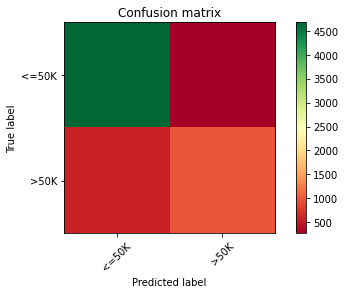

In [38]:
#Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap='RdYlGn')
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ["<=50K", ">50K"], rotation=45)
    plt.yticks(tick_marks, ["<=50K", ">50K"])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

plot_confusion_matrix(y_test, y_pred)


# **Model 3: Naive-Bayes Classifier**


In [39]:
# Initialize the classifier
NBModel = GaussianNB()

# Train the classifier using the training data
NBModel.fit(X_train, y_train)

# Make predictions on the test data
y_pred = NBModel.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8062336864732075


[[3959  983]
 [ 279 1292]]


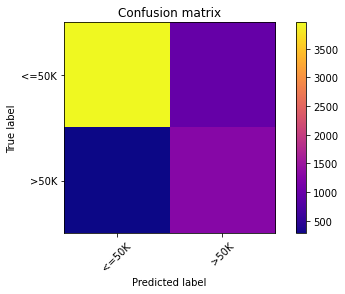

In [40]:
#Plotting the confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap='plasma')
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ["<=50K", ">50K"], rotation=45)
    plt.yticks(tick_marks, ["<=50K", ">50K"])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

plot_confusion_matrix(y_test, y_pred)

# **Model Optimization for Naive-Bayes**

GaussianNB Accuracy: 0.8062336864732075
MultinomialNB Accuracy: 0.7801320436050975
BernoulliNB Accuracy: 0.756947643175188


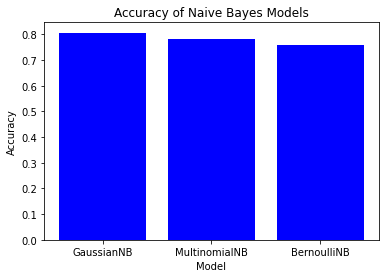

In [41]:
# Create Bernoulli and MultinomialNB models
gaussian_model = GaussianNB()
multinomial_model = MultinomialNB()
bernoulli_model = BernoulliNB()

# Fit the models to the training data
gaussian_model.fit(X_train, y_train)
multinomial_model.fit(X_train, y_train)
bernoulli_model.fit(X_train, y_train)

# Use the models to make predictions on the test data
gaussian_predictions = gaussian_model.predict(X_test)
multinomial_predictions = multinomial_model.predict(X_test)
bernoulli_predictions = bernoulli_model.predict(X_test)

# Calculate the accuracy of each model's predictions
gaussian_accuracy = accuracy_score(y_test, gaussian_predictions)
multinomial_accuracy = accuracy_score(y_test, multinomial_predictions)
bernoulli_accuracy = accuracy_score(y_test, bernoulli_predictions)

# Print the accuracies
print("GaussianNB Accuracy:", gaussian_accuracy)
print("MultinomialNB Accuracy:", multinomial_accuracy)
print("BernoulliNB Accuracy:", bernoulli_accuracy)

# Create a bar plot of the accuracies
plt.bar(["GaussianNB", "MultinomialNB", "BernoulliNB"], [gaussian_accuracy, multinomial_accuracy, bernoulli_accuracy])
plt.title("Accuracy of Naive Bayes Models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()


# **Problem 2: Clustering the Occupations into low and High paying Occupations**

## **Model1: K-Means Clustering**

In [42]:
# Create a new column that indicates whether an occupation is high paying or low paying
# based on the income value
incomNonull["income_group"] = incomNonull["EarnsOver50K"].apply(lambda x: "low paying" if x ==  0 else "high paying")

# Select only the relevant columns
X = incomNonull[['occupation', 'EarnsOver50K']]

# One-hot encode the occupation column
X = pd.get_dummies(X, columns=['occupation'])

# Extract the income column as the target variable
y = X['EarnsOver50K']
X = X.drop('EarnsOver50K', axis=1)

# Use K-Means to cluster the occupations into 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

# Print the occupations in each cluster
print('Cluster 0: Low earning occupations', [col for col in X.columns if kmeans.labels_[X[col] == 1][0] == 0])
print('Cluster 1: High earning occupations', [col for col in X.columns if kmeans.labels_[X[col] == 1][0] == 1])

Cluster 0: Low earning occupations ['occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving']
Cluster 1: High earning occupations ['occupation_Prof-specialty']


In [44]:
scores = silhouette_score(X, kmeans.labels_, metric='euclidean')

# Print the average silhouette score
print(f'Average silhouette score: {scores:.3f}')

Average silhouette score: 0.279


In [45]:
#drop the income-group column
incomNonull = incomNonull.drop('income_group', axis=1)

# **Model2: K-Means Clustering**

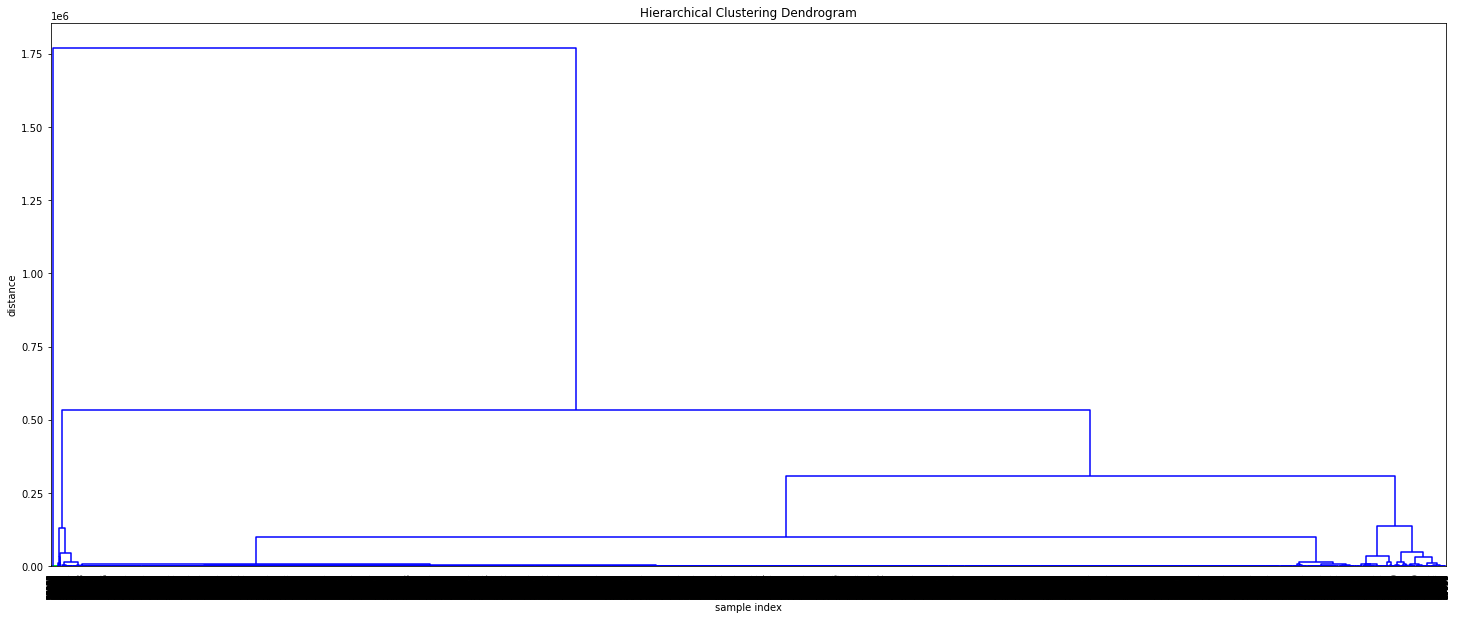

In [47]:
cat_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
le = LabelEncoder()
for col in cat_columns:
    incomNonull[col] = le.fit_transform(incomNonull[col])

# Select the features and target
X = incomNonull.drop(columns=['EarnsOver50K'])
y = incomNonull['EarnsOver50K']

# Perform hierarchical clustering
Z = linkage(X, 'ward')

# Plot the dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

# **Problem 3: Clustering the Occupations into low and High paying Occupations**

# **Model: K-Means Clustering**

In [49]:
X = incom[['education-num']]
# Set the number of clusters to 3
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(X)

# Predict the cluster labels for each data point
predicted_labels = kmeans.predict(X)

# Add the predicted cluster labels to the dataframe
incom['education_cluster'] = predicted_labels

# View the resulting clusters
incom.groupby('education_cluster').mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
education_cluster,,,,,,,
0,37.594074,188918.026674,9.490743,588.270312,70.221095,39.901719,0.176264
1,40.463652,186923.301511,13.333589,2460.297898,138.212174,43.098642,0.456974
2,39.150524,201020.996597,5.330628,283.441623,53.257853,36.824084,0.055236


In [50]:
X.loc[:, 'cluster'] = kmeans.labels_



def rename_cluster(cluster_dict, X, cluster_col):
    X[cluster_col] = X[cluster_col].apply(lambda x: cluster_dict[x])

# Rename clusters
cluster_dict = {0: 'Highly Educated', 1: 'Moderately Educated', 2: 'Low or No Education'}
rename_cluster(cluster_dict, X, 'cluster')

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
<ipython-input-50-6897ed9499d3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cluster_col] = X[cluster_col].apply(lambda x: cluster_dict[x])


In [51]:
X['cluster'].value_counts()

Highly Educated        19607
Moderately Educated     9134
Low or No Education     3820
Name: cluster, dtype: int64

# **Thank you for getting this far. **